In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:\Practice\ML Practice\ML lab\Lab5\heart.csv')
X = df[['restecg', 'oldpeak']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
adb = AdaBoostClassifier(n_estimators=100, random_state=42, algorithm='SAMME')

In [8]:
# Train Random Forest
rf.fit(X_train_scaled, y_train)
rf_train_acc = rf.score(X_train_scaled, y_train)
rf_test_acc = rf.score(X_test_scaled, y_test)

# Train AdaBoost
adb.fit(X_train_scaled, y_train)
adb_train_acc = adb.score(X_train_scaled, y_train)
adb_test_acc = adb.score(X_test_scaled, y_test)

print(f"Random Forest - Train Accuracy: {rf_train_acc:.3f}, Test Accuracy: {rf_test_acc:.3f}")
print(f"AdaBoost - Train Accuracy: {adb_train_acc:.3f}, Test Accuracy: {adb_test_acc:.3f}")


Random Forest - Train Accuracy: 0.773, Test Accuracy: 0.688
AdaBoost - Train Accuracy: 0.717, Test Accuracy: 0.659


In [9]:
# Voting Classifier using RF and AdaBoost
voting = VotingClassifier(
    estimators=[('rf', rf), ('adb', adb)],
    voting='soft'
)
voting.fit(X_train_scaled, y_train)

voting_train_acc = voting.score(X_train_scaled, y_train)
voting_test_acc = voting.score(X_test_scaled, y_test)

print(f"Voting Ensemble - Train Accuracy: {voting_train_acc:.3f}, Test Accuracy: {voting_test_acc:.3f}")


Voting Ensemble - Train Accuracy: 0.773, Test Accuracy: 0.688


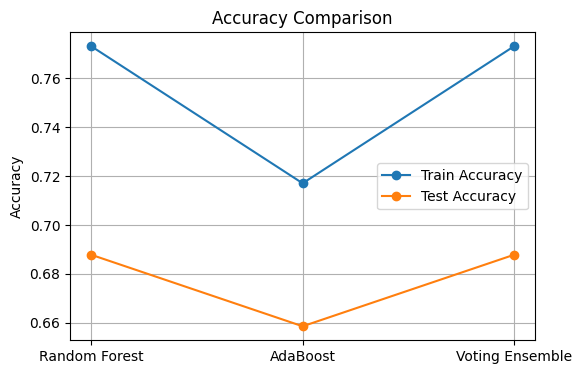

In [12]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'AdaBoost', 'Voting Ensemble']
train_acc = [rf_train_acc, adb_train_acc, voting_train_acc]
test_acc = [rf_test_acc, adb_test_acc, voting_test_acc]

plt.figure(figsize=(6,4))
plt.plot(models, train_acc, marker='o', label='Train Accuracy')
plt.plot(models, test_acc, marker='o', label='Test Accuracy')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()
